In [40]:
import numpy as np
#file_data = np.load("file_data_HBCD.npy", allow_pickle=True)
loss = np.load("reg_loss_list.npy")
data = np.load("embeddings.npy")
scat = np.load("scat_coeffs.npy")
times = np.load('times.npy')
#data = np.load("ordered_moments.npy")
# props = np.load("embedding_prop_lists.npy")
# atom_percentages = np.load("atom_percentages.npy")
# minEstate = props[0]
# molWt = props[1]
# qed = props[2]
# tpsa = props[3]
# ki = props[4]
# carbon = atom_percentages[0]
# nitrogen = atom_percentages[1]
# oxygen = atom_percentages[2]

In [2]:
file_data

array([{'name': './raw_tranches/HBCD.smi', 'count': 2468}], dtype=object)

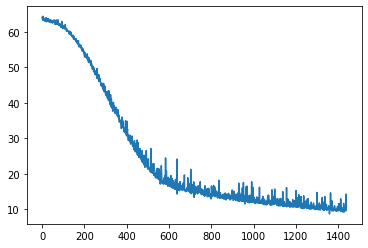

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
#print(loss)
plt.plot(loss)

In [42]:
import phate
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(data)

Calculating PHATE...
  Running PHATE on 9985 observations and 25 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 2.90 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 3.01 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.94 seconds.
    Calculating KMeans...
    Calculated KMeans in 14.71 seconds.
  Calculated landmark operator in 17.76 seconds.
  Calculating optimal t...
    Automatically selected t = 7
  Calculated optimal t in 3.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.25 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.56 seconds.
Calculated PHATE in 29.64 seconds.


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

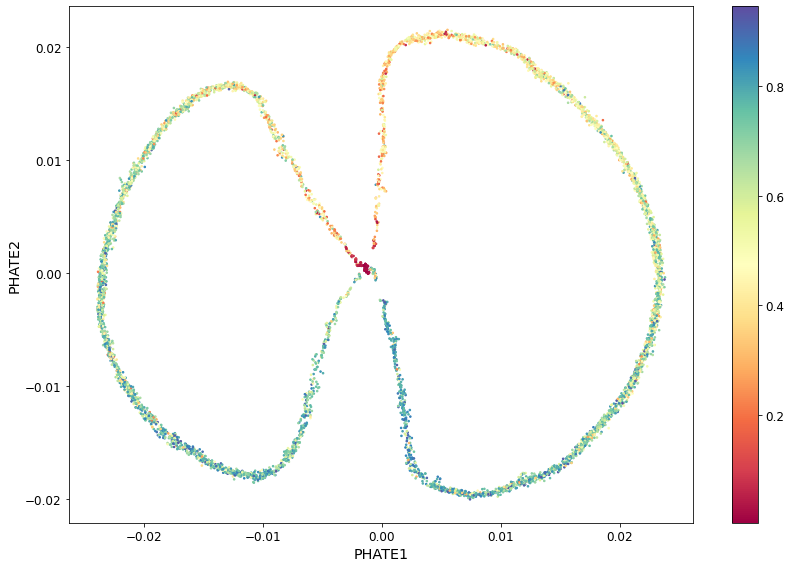

In [9]:
import scprep
scprep.plot.scatter2d(data_phate, #c=qed,
                      figsize=(12,8), cmap="Spectral",
                      ticks=True, label_prefix="PHATE")

In [8]:
np.save("phate_coords_2d.npy", data_phate)

In [43]:
phate_op.set_params(n_components=3)
Y_phate3d = phate_op.transform()

Calculating metric MDS...
Calculated metric MDS in 205.65 seconds.


In [44]:
import scprep
scprep.plot.rotate_scatter3d(Y_phate3d,
                             figsize=(8,6), cmap="Spectral",
                             ticks=False, label_prefix="PHATE",
                             c = times,
                             #filename="gifs/GB3_lr0_000025_20epoch_dim25.gif"
                            )

In [45]:
import re
def get_smi(file_data, idx):
    collective_sum = 0
    file_no = 0
    while collective_sum <= idx:
        collective_sum += file_data[file_no]['count']
        file_no += 1

    collective_sum = collective_sum - file_data[file_no - 1]['count']
    subtranch = file_data[file_no - 1]['name']
    
    line_no = idx - collective_sum
    line = linecache.getline(subtranch, lineno = line_no + 2)
    line = line.strip()
    line = re.split('\s+',line)

    return line[0]
            

In [42]:
from pysmiles import read_smiles
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

def generate_feature_mat(atom_list, atom):
    
    length = len(atom_list)

    mat = []

    for indx, entry in enumerate(atom_list):
        arr = np.zeros(length)
        if entry[1] == atom:
            arr[indx] = 1
        
        mat.append(arr)

    mat = np.array(mat)

    return mat

smiles = 'C'
mol = read_smiles(smiles, explicit_hydrogen=True)

atom_list = mol.nodes(data='element')


mat = generate_feature_mat(atom_list, 'H')

print(np.eye(4))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [21]:
from timeit import default_timer as timer
smi = get_smi(file_data, 525733228)
end = timer()
print(smi)
#print(end-start)

CCC[C@@H](C)CC(=O)NCC1CCN(C(=O)c2n[nH]cc2C)CC1


In [7]:
from ZINC_dataset import ZINCDataset, SmileToAdj, AdjToScat, ScatToMoments
from torchvision import transforms
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
from timeit import default_timer as timer



ds = ZINCDataset(transform=transforms.Compose([SmileToAdj(), AdjToScat(), ScatToMoments()]))
train_dataloader = DataLoader(ds, batch_size=100, shuffle=False, num_workers=10)

In [8]:
start = timer()
i = iter(train_dataloader)
train_features, train_labels = next(i)
end = timer()

print(end - start)
print(train_features)

Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemica

E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochem

Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z st

Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemica

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded

E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains s

E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical inf

E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemica

E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "

E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochem

Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical

Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.


2.5447683839593083
tensor([[ 1.0290,  2.2371,  1.8339,  ...,  8.3701,  6.8623,  4.6967],
        [ 1.0929,  2.1912,  1.7917,  ...,  9.4997,  7.8019,  5.7949],
        [ 1.0929,  2.1912,  1.7917,  ...,  9.4997,  7.8019,  5.7949],
        ...,
        [ 2.3637,  4.5870,  3.7280,  ..., 41.2652, 33.3386, 26.1641],
        [ 1.9149,  4.3247,  3.4904,  ..., 31.4078, 23.5541, 17.2307],
        [ 2.0260,  4.4249,  3.5777,  ..., 34.2422, 26.0242, 19.3906]])


E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereoche

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stere

Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochem

E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical infor

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z st

Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemica

E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z ste

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" cont

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemi

Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemica

E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contai

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@

E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Ato

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereo

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stere

Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z ste

Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
Atom "[C@@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contain

E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical i

In [13]:
smi = get_smi(counts, names, 1)
print(smi)

O=c1[nH]c(=O)n([C@@H]2C[C@@H](O)[C@H](CO)O2)cc1F


In [27]:
from datetime import datetime
filename = datetime.now().strftime("%Y%m%d-%H%M%S")
print(filename)

20210813-222529
